# Panel Data Analysis

In [1]:
pip install linearmodels

Note: you may need to restart the kernel to use updated packages.


In [147]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats 
from linearmodels import PanelOLS, RandomEffects, PooledOLS
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_excel("Worldbank_panel.xlsx")
year = pd.Categorical(df.year)
df = df.set_index(["id", "year"])
df["year"] = year
df

v1            v2        v3           v4          v5  \
id      year                                                                
Albania 2015         NaN           NaN       NaN     39699.53    242870.0   
        2016         NaN  2.663400e+04     306.0     30279.78    266379.0   
        2017         NaN  2.040900e+05    1904.0     53273.59    303612.0   
        2018    0.000000  3.031370e+05    2935.0     13648.00    361947.0   
Algeria 2015   21.901645  5.400896e+06   65940.0   1635509.00   2269348.0   
...                  ...           ...       ...          ...         ...   
Vietnam 2018  762.661950  4.704967e+07  283787.0  13008500.00  12994451.0   
Zambia  2015   79.382096  2.036170e+05   11130.0          NaN     23390.0   
        2016   80.352947  1.440600e+05    8094.0          NaN     31784.0   
        2017   81.557610  1.545730e+05    9020.0          NaN     35912.0   
        2018   75.077398  1.663314e+04    1241.0          NaN     72228.0   

                     v6       v7        v8         v9           v10  ...  \
id      year                                                         ...   
Albania 2015   8.402315   226718  7.843521   1.634190  1.660749e+07  ...   
        2016   9.228641   248640  8.614077   0.784313  1.019991e+07  ...   
        2017  10.526845   246720  8.554284   0.088457  1.119016e+06  ...   
        2018  12.555659   248631  8.624815   0.044702  5.917170e+05  ...   
Algeria 2015   5.712209  3267592  8.224904   0.233281  2.549728e+06  ...   
...                 ...      ...       ...        ...           ...  ...   
Vietnam 2018  13.600210  4296301  4.496580  40.750121  8.261115e+10  ...   
Zambia  2015   0.147298   116165  0.731547   6.709311  5.270419e+07  ...   
        2016   0.194238   101407  0.619716  27.413299  2.562569e+08  ...   
        2017   0.213082   101444  0.601913   4.109836  3.646522e+07  ...   
        2018   0.416259   100444  0.578871   2.002262  2.580551e+07  ...   

                      v30        v31        v32        v33         v34  \
id      year                                                             
Albania 2015  3952.802538   8.194605  80.694759  11.110635   27.267391   
        2016  4090.371657   7.769623  80.961061  11.269315   28.977899   
        2017  4249.803734   8.893543  79.608056  11.498401   31.569808   
        2018  4431.539181   9.605795  79.107646  11.286560   31.571927   
Algeria 2015  4177.889542  37.429177  41.010477  21.560346   23.171778   
...                   ...        ...        ...        ...         ...   
Vietnam 2018  2456.791224  25.957972  67.571972   6.470056  105.831805   
Zambia  2015  1338.290927  34.572829  50.646686  14.780593   37.138526   
        2016  1347.748086  32.516729  51.411397  16.071874   35.324676   
        2017  1354.407115  39.297955  46.980964  13.720795   34.992858   
        2018  1368.601756  42.323254  44.968083  12.708663   37.957405   

                     v35       v36   v37     v38  year  
id      year                                            
Albania 2015   44.533615  4.896312   9.6  78.025  2015  
        2016   45.831964  4.916017   9.4  78.194  2016  
        2017   46.624466  5.012636   9.4  78.333  2017  
        2018   45.236191  5.232072   9.5  78.458  2018  
Algeria 2015   36.523351  6.978489  25.2  76.090  2015  
...                  ...       ...   ...     ...   ...  
Vietnam 2018  102.474861  5.034489  21.3  75.317  2018  
Zambia  2015   42.726891  4.435102  67.7  61.737  2015  
        2016   38.633886  4.477207  65.3  62.464  2016  
        2017   36.592837  4.376977  64.6  63.043  2017  
        2018   36.930965  5.032715  65.4  63.510  2018  

[360 rows x 39 columns]

### Proposed dependent variable: v30 (GDP per capita)

Independent variables (included only those, which have correlation with others less than or equal to 0.75):

- v15 (Individuals using the Internet (% of population))
- v17 (Industrial design applications, resident, by count)
- v19 (Mobile cellular subscriptions (per 100 people))
- v22 (Scientific and technical journal articles)
- v23 (Secure Internet Servers)
- v35 (Imports of goods and services (% of GDP))
- v38 (Life expectancy at birth, total (years))

In [119]:
chosen_df = df[['v15','v17','v19','v22','v23','v35','v38','v30','year']]
chosen_df

v15     v17         v19      v22     v23         v35  \
id      year                                                               
Albania 2015  56.900000     NaN  117.659218   177.80     197   44.533615   
        2016  59.600000     NaN  116.744444   185.87     416   45.831964   
        2017  62.400000     NaN  125.710352   149.54    1273   46.624466   
        2018  65.400000     NaN   94.176998   180.36    1508   45.236191   
Algeria 2015  38.200000     NaN  108.808940  4157.18     152   36.523351   
...                 ...     ...         ...      ...     ...         ...   
Vietnam 2018  69.847929  1891.0  147.195273  4286.48  169056  102.474861   
Zambia  2015        NaN    21.0   72.784572   157.23      90   42.726891   
        2016        NaN    68.0   73.438230   181.66     145   38.633886   
        2017        NaN    30.0   79.736910   209.45     714   36.592837   
        2018  14.299997    39.0   89.157044   213.07     715   36.930965   

                 v38          v30  year  
id      year                             
Albania 2015  78.025  3952.802538  2015  
        2016  78.194  4090.371657  2016  
        2017  78.333  4249.803734  2017  
        2018  78.458  4431.539181  2018  
Algeria 2015  76.090  4177.889542  2015  
...              ...          ...   ...  
Vietnam 2018  75.317  2456.791224  2018  
Zambia  2015  61.737  1338.290927  2015  
        2016  62.464  1347.748086  2016  
        2017  63.043  1354.407115  2017  
        2018  63.510  1368.601756  2018  

[360 rows x 9 columns]

In [120]:
chosen_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 360 entries, ('Albania', 2015) to ('Zambia', 2018)
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   v15     338 non-null    float64 
 1   v17     323 non-null    float64 
 2   v19     360 non-null    float64 
 3   v22     360 non-null    float64 
 4   v23     360 non-null    int64   
 5   v35     360 non-null    float64 
 6   v38     360 non-null    float64 
 7   v30     360 non-null    float64 
 8   year    360 non-null    category
dtypes: category(1), float64(7), int64(1)
memory usage: 26.8+ KB


In [121]:
chosen_df['v15'] = chosen_df['v15'].fillna(chosen_df['v15'].median())
chosen_df['v17'] = chosen_df['v17'].fillna(chosen_df['v17'].median())

<ipython-input-121-dbf4dd0b289c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_df['v15'] = chosen_df['v15'].fillna(chosen_df['v15'].median())
<ipython-input-121-dbf4dd0b289c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_df['v17'] = chosen_df['v17'].fillna(chosen_df['v17'].median())


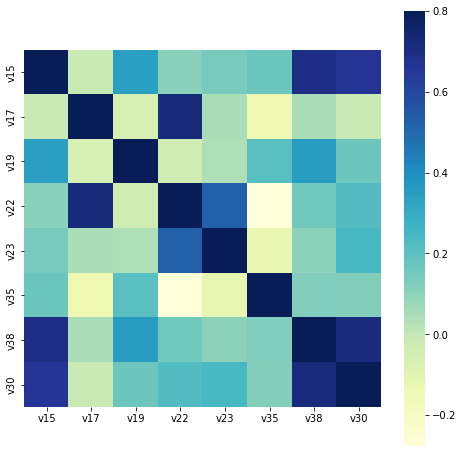

In [122]:
corr = chosen_df.corr('pearson')
plt.figure(figsize=(8, 8))
sns.heatmap(corr, vmax=.8, square=True, cmap='YlGnBu')
plt.show()

### Dependent variable

##### Hypothesis:

H1: The distribution of the variable 'v30' is different from the normal distribution

H0: The distribution of the variable 'v30' is not different from the normal distribution

p-value = 0.05

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

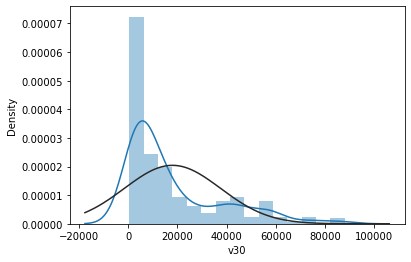

In [123]:
sns.distplot(chosen_df['v30'], fit=stats.norm)

In [124]:
stats.kstest(chosen_df['v30'], 'norm', args=(chosen_df['v30'].mean(), chosen_df['v30'].std()))

KstestResult(statistic=0.20979008539557886, pvalue=2.2292422785252543e-14)

In [125]:
print('Skewness: {:.4f}'.format(chosen_df['v30'].skew()))
print('Kurtosis: {:.4f}'.format(chosen_df['v30'].kurt()))
print('Quartile Deviation: {:.4f}'.format((chosen_df['v30'].quantile(0.75) - chosen_df['v30'].quantile(0.25))/2))
print('Decile Ratio: {:.4f}'.format(chosen_df['v30'].quantile(0.9)/chosen_df['v30'].quantile(0.1)))

Skewness: 1.4536
Kurtosis: 1.3431
Quartile Deviation: 11024.0061
Decile Ratio: 23.0463


##### Conclusion:

The dependent variable 'v30' deviates from the normal distribution (H1 is accepted at p-value = 0.05). It is positively skewed with a quite small kurtosis.

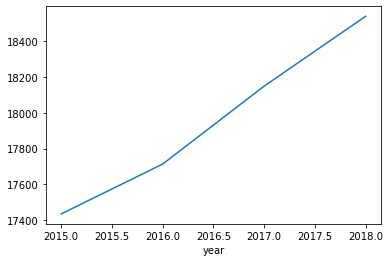

In [126]:
chosen_df['v30'].groupby('year').mean().plot()

There is almost linear relationship between the year and the GDP

### Independent variables

#### v15 Individuals using the Internet (% of population)

##### Hypothesis:

H1: The distribution of the variable 'v15' is different from the normal distribution

H0: The distribution of the variable 'v15' is not different from the normal distribution

p-value = 0.05

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

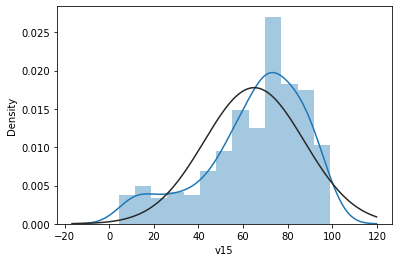

In [127]:
sns.distplot(chosen_df['v15'], fit=stats.norm)

In [128]:
stats.kstest(chosen_df['v15'], 'norm', args=(chosen_df['v15'].mean(), chosen_df['v15'].std()))

KstestResult(statistic=0.11894408459464512, pvalue=6.781346986713443e-05)

##### Conclusion:

The dependent variable 'v15' deviates from the normal distribution (H1 is accepted at p-value = 0.05).

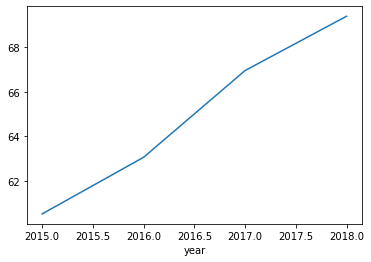

In [129]:
chosen_df['v15'].groupby('year').mean().plot()

There is almost linear relationship between year and Individuals using the Internet (% of population).

#### v17 Industrial design applications, resident, by count

##### Hypothesis:

H1: The distribution of the variable 'v17' is different from the normal distribution

H0: The distribution of the variable 'v17' is not different from the normal distribution

p-value = 0.05

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

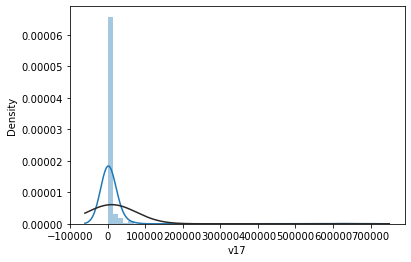

In [130]:
sns.distplot(chosen_df['v17'], fit=stats.norm)

In [131]:
stats.kstest(chosen_df['v17'], 'norm', args=(chosen_df['v17'].mean(), chosen_df['v17'].std()))

KstestResult(statistic=0.43669384857573523, pvalue=5.659221250494235e-63)

##### Conclusion:

The dependent variable 'v17' deviates from the normal distribution (H1 is accepted at p-value = 0.05).

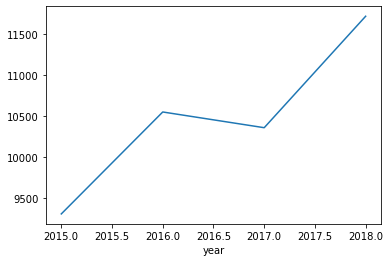

In [132]:
chosen_df['v17'].groupby('year').mean().plot()

In general, there is a linear relationship between 'Industrial design applications, resident, by count' and year with a small decrease in 2017 in comparison to 2016

#### v19 Mobile cellular subscriptions (per 100 people)

##### Hypothesis:

H1: The distribution of the variable 'v19' is different from the normal distribution

H0: The distribution of the variable 'v19' is not different from the normal distribution

p-value = 0.05

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

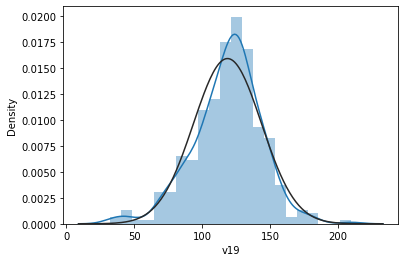

In [133]:
sns.distplot(chosen_df['v19'], fit=stats.norm)

In [134]:
stats.kstest(chosen_df['v19'], 'norm', args=(chosen_df['v19'].mean(), chosen_df['v19'].std()))

KstestResult(statistic=0.07284326928184737, pvalue=0.04166634136947822)

##### Conclusion:

The dependent variable 'v19' deviates from the normal distribution (H1 is accepted at p-value = 0.05). However, H1 is rejected at p-value 0.01

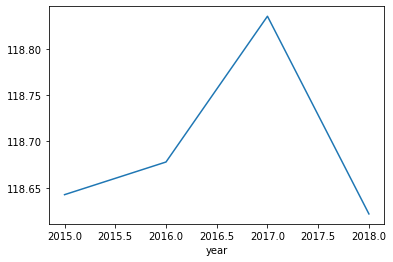

In [135]:
chosen_df['v19'].groupby('year').mean().plot()

Mobile cellular subscriptions (per 100 people) is quite stable throughout all years (difference only in 0.15).

#### v22 Scientific and technical journal articles

##### Hypothesis:

H1: The distribution of the variable 'v22' is different from the normal distribution

H0: The distribution of the variable 'v22' is not different from the normal distribution

p-value = 0.05

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

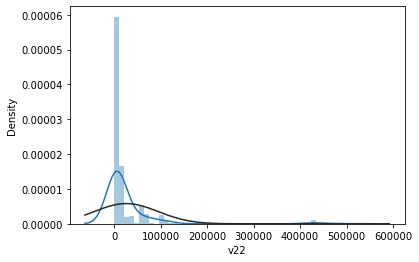

In [136]:
sns.distplot(chosen_df['v22'], fit=stats.norm)

In [137]:
stats.kstest(chosen_df['v22'], 'norm', args=(chosen_df['v22'].mean(), chosen_df['v22'].std()))

KstestResult(statistic=0.3569646484629863, pvalue=1.4559323757238256e-41)

##### Conclusion:

The dependent variable 'v22' deviates from the normal distribution (H1 is accepted at p-value = 0.05).

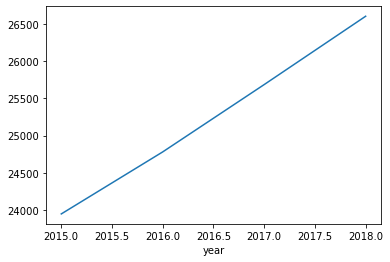

In [138]:
chosen_df['v22'].groupby('year').mean().plot()

Obviously, there is a linear relationship between Scientific and technical journal articles and year.

#### v23 Secure Internet servers

##### Hypothesis:

H1: The distribution of the variable 'v23' is different from the normal distribution

H0: The distribution of the variable 'v23' is not different from the normal distribution

p-value = 0.05

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

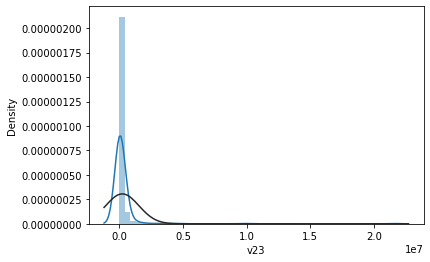

In [139]:
sns.distplot(chosen_df['v23'], fit=stats.norm)

In [140]:
stats.kstest(chosen_df['v23'], 'norm', args=(chosen_df['v23'].mean(), chosen_df['v23'].std()))

KstestResult(statistic=0.43077016043874045, pvalue=3.305932149513027e-61)

##### Conclusion:

The dependent variable 'v23' deviates from the normal distribution (H1 is accepted at p-value = 0.05).

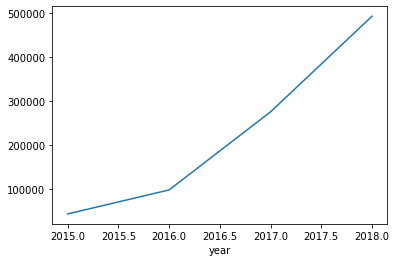

In [141]:
chosen_df['v23'].groupby('year').mean().plot()

Secure Internet servers number grows exponentially within these 4 years

#### v35 Imports of goods and services (% of GDP)

##### Hypothesis:

H1: The distribution of the variable 'v35' is different from the normal distribution

H0: The distribution of the variable 'v35' is not different from the normal distribution

p-value = 0.05

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

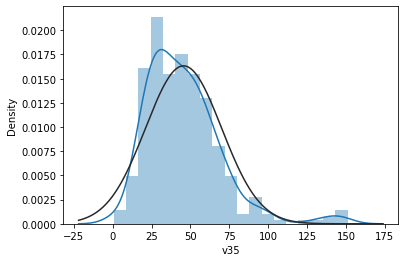

In [142]:
sns.distplot(chosen_df['v35'], fit=stats.norm)

In [143]:
stats.kstest(chosen_df['v35'], 'norm', args=(chosen_df['v35'].mean(), chosen_df['v35'].std()))

KstestResult(statistic=0.0760756108294938, pvalue=0.02938002048117694)

##### Conclusion:

The dependent variable 'v35' deviates from the normal distribution (H1 is accepted at p-value = 0.05). However, H1 is rejected at p-value 0.01

#### v38 Life expectancy at birth, total (years)

##### Hypothesis:

H1: The distribution of the variable 'v38' is different from the normal distribution

H0: The distribution of the variable 'v38' is not different from the normal distribution

p-value = 0.05

C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Admin\Miniconda3\envs\IntroML\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Admin\Miniconda3\envs\IntroML\l

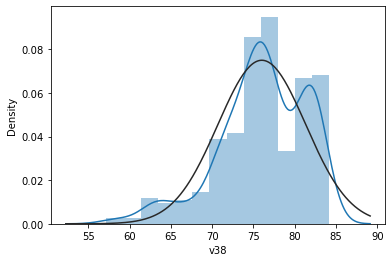

In [144]:
sns.distplot(chosen_df['v38'], fit=stats.norm)

In [145]:
stats.kstest(chosen_df['v38'], 'norm', args=(chosen_df['v38'].mean(), chosen_df['v38'].std()))

KstestResult(statistic=0.08064911849142009, pvalue=0.01746275359456608)

##### Conclusion:

The dependent variable 'v38' deviates from the normal distribution (H1 is accepted at p-value = 0.05). However, H1 is rejected at p-value 0.01

## Regression Model

#### Hypotheses for relations between independent and dependent vars:

- H0_1: The variable v15 is statistically significant for the logistic regression model constructed for a dependent variable 'v30'
- H0_2: The variable v17 is statistically significant for the logistic regression model constructed for a dependent variable 'v30'
- H0_3: The variable v19 is statistically significant for the logistic regression model constructed for a dependent variable 'v30'
- H0_4: The variable v22 is statistically significant for the logistic regression model constructed for a dependent variable 'v30'
- H0_5: The variable v23 is statistically significant for the logistic regression model constructed for a dependent variable 'v30'
- H0_6: The variable v35 is statistically significant for the logistic regression model constructed for a dependent variable 'v30'
- H0_7: The variable v38 is statistically significant for the logistic regression model constructed for a dependent variable 'v30'

- H1_1: The variable v15 is not statistically significant for the logistic regression model constructed for a dependent variable 'v30'
- H1_2: The variable v17 is not statistically significant for the logistic regression model constructed for a dependent variable 'v30'
- H1_3: The variable v19 is not statistically significant for the logistic regression model constructed for a dependent variable 'v30'
- H1_4: The variable v22 is not statistically significant for the logistic regression model constructed for a dependent variable 'v30'
- H1_5: The variable v23 is not statistically significant for the logistic regression model constructed for a dependent variable 'v30'
- H1_6: The variable v35 is not statistically significant for the logistic regression model constructed for a dependent variable 'v30'
- H1_7: The variable v38 is not statistically significant for the logistic regression model constructed for a dependent variable 'v30'

### Pooled Model

In [146]:
exog_vars = ["v15", "v17", "v19", "v22", "v23", "v35", "v38", "year"]
exog = sm.add_constant(chosen_df[exog_vars])
mod = PooledOLS(chosen_df.v30, exog)
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                    v30   R-squared:                        0.6301
Estimator:                  PooledOLS   R-squared (Between):              0.6424
No. Observations:                 360   R-squared (Within):              -8.1029
Date:                Sat, May 14 2022   R-squared (Overall):              0.6301
Time:                        18:43:18   Log-likelihood                   -3888.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      59.440
Entities:                          90   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(10,349)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             59.440
                            

From first glance, the model is quite feasible since it has quite high R-squared. However, there is enourmously low R-squared (Within) that indicates that something goes wrong: the model does not decribe well changes over years within countries.

### Fixed effect model

In [149]:
exog_vars = ["v15", "v17", "v19", "v22", "v23", "v35", "v38", "year"]
exog = sm.add_constant(chosen_df[exog_vars])
mod = PanelOLS(chosen_df.v30, exog, entity_effects=True)
fe_res = mod.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    v30   R-squared:                        0.3822
Estimator:                   PanelOLS   R-squared (Between):             -0.1869
No. Observations:                 360   R-squared (Within):               0.3822
Date:                Sat, May 14 2022   R-squared (Overall):             -0.1861
Time:                        18:45:08   Log-likelihood                   -2799.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      16.084
Entities:                          90   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(10,260)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             16.084
                            

The model is less feasible in comparison to the previous one according to R-squared. However, R-squared (Within) becomes positive meaning that the model much better describes changes over years within countries, but the variation between countries is captured worse.

### Random effect model

In [150]:
mod = RandomEffects(chosen_df.v30, exog)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                    v30   R-squared:                        0.2944
Estimator:              RandomEffects   R-squared (Between):              0.3023
No. Observations:                 360   R-squared (Within):               0.2903
Date:                Sat, May 14 2022   R-squared (Overall):              0.3023
Time:                        18:46:04   Log-likelihood                   -2899.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      14.563
Entities:                          90   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(10,349)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             14.563
                            

The model is less feasible in comparison to the Pool Model according to R-squared. However, here all R-Squared are nearby 0.3, so the model fits the data simultaneously between and within countries better in average.

## Selection of a Panel Data Model

#### Hypotheses:

H0: no individual effects in the dataset

H1: there exist some individual effects in the dataset

In [152]:
from statsmodels.stats.diagnostic import het_breuschpagan
residuals_pooled_OLS = pooled_res.resids #save residuals
pooled_OLS_dataset = pd.concat([chosen_df, residuals_pooled_OLS], axis=1) #add the resisduals to the original dataset
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
print('P-value:', breusch_pagan_test_results[3])

P-value: 0.0007783457222519093


#### Conclusion:

H1 is accepted => there are individual effects => we should select a model with effects (fixed or random).

#### Hypotheses:

H0: individual effects and regressors are not correlated (they are random)

H1: there is a correlation between individual effects and regressors

In [153]:
import numpy.linalg as la
from scipy import stats
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

hausman_results = hausman(fe_res, re_res) 
print('p-value: ' + str(hausman_results[2]))

p-value: 2.7243856869868795e-19


H1 is accepted => there is a correlation => fixed-effects model has to be chosen.

Although R-squared preliminary analysis showed that Random Effects Model is better at describing variances simultaneously between and within countries, the analysis performed above has proved that fixed-effects model is better here. Reason: there exist individual effects of countries that influence the change in GDP throughout the years, so Pooled cannot be used; then, there exists correlation between such individual effects and model regressors, which means that a model with fixed effects has to be used at this dataset

## Model description

In [154]:
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                    v30   R-squared:                        0.3822
Estimator:                   PanelOLS   R-squared (Between):             -0.1869
No. Observations:                 360   R-squared (Within):               0.3822
Date:                Sat, May 14 2022   R-squared (Overall):             -0.1861
Time:                        18:45:08   Log-likelihood                   -2799.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      16.084
Entities:                          90   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(10,260)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             16.084
                            

The model is statistically significant according to P-value of the model.
Statistically significant dependent variables are the following (at p-value = 0.05):

- v15
- v23
- year (2016,2017,2018)

So, H1_1 and H1_5 are rejected, H1_2, H1_3, H1_4, H1_6 and H1_7 are accepted at p-value = 0.05.

General R-squared is 0.38 meaning that the model describes 38% dispersion of the dependent variable. 

R-squared (Between) is negative - the model describes variation in the dependent variable between units of analysis worse than the model that could randomly predict the dependent variable.

R-squared (Within) is 0.38 meaning that the model describes 38% variation in the dependent variable within units of analysis.

### Relationships

In [159]:
coefs = pd.DataFrame()
coefs['Coefs'] = fe_res.params[1:]
coefs['Features'] = fe_res.params.index[1:]
coefs.set_index('Features', inplace=True)
coefs

,Coefs
Features,
v15,-13.333009
v17,0.009739
v19,7.800878
v22,-0.010729
v23,0.000097
v35,-19.308257
v38,-350.330612
year.2016,381.646206
year.2017,947.886932


- Let's consider the coefficient on the variable v15 (Individuals using the Internet (% of population)). The regression coefficient for the variable is negative and equals -13.3. It can be concluded that an increase in Individuals using the Internet (% of population) by one percent, on average, leads to a decrease of GDP by 13.3 dollars.
- Let's consider the coefficient on the variable v23 (Secure Internet servers). The regression coefficient for this variable is 0.000097. It can be concluded that an increase in number of secure internet servers by 10000, on average, leads to an increase in GDP by 0.97 dollars.

As for the years:
- In comparison to 2015, the GDP in 2016 is, on average, higher on 381.6 dollars; the GDP in 2017 is, on average, higher on 948 dollars; the GDP in 2018 is, on average, higher on 1437 dollars.

All the other predictors are not statistically significant

## Final conclusions

According to the chosen dependent variable and predictor, the most promising model appears to be fixed-effect model due to existence of individual effects of countries that influence the change in GDP throughout the years, so Pooled cannot be used, and existence of correlation between such individual effects and model regressors. The result model is statistically significant but R-squared (Between) is negative, which means that the model badly describes variation in the dependent variable between units of analysis. Probably, a change of independent variables can influence this indicator in a positive way. General R-squared is 0.38 meaning that the model describes 38% of dispersion of the dependent variable, which is not that bad, but is much worse in comparison to the Pooled model. 

As for dependent variables, only 2 of them appear to be significant: Individuals using the Internet (% of population) and Secure Internet servers. That means that all the other variables can be replaced with some other from the source dataset. Such a change can probably make the model fit the data better. As for significant parameters, it is seen that they have a very small influence on the actual value of the country GDP. The most influential parameter is a year, which was obvious even before the analysis.

All in all, from my perspective, the model is not really applicable for use in practice and has to be readjusted.